In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("rocket")

In [2]:
df = pd.read_csv('df.csv', index_col=0)
df.head()

,date,category_id,sku_id,sales_price,sales_quantity
78161,2016-11-25,7,1108,457.60,1.0
81079,2016-11-18,7,2999,470.60,1.0
81177,2016-11-18,7,1428,717.60,1.0
81292,2016-11-18,7,3923,383.50,1.0
81416,2016-11-18,17,8075,18.85,2.0


In [ ]:
pd.isna(df).sum()

In [13]:
df.sku_id.nunique()

1059

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)

In [17]:
categories = df.category_id.unique()
sales_by_categories = df.groupby('category_id')['sales_quantity'].sum()
sales_by_categories.head()

category_id
7       90787.0
17     782545.0
23    2768304.0
Name: sales_quantity, dtype: float64

In [18]:
entities_by_categories = df.groupby('category_id')['sku_id'].count()
entities_by_categories.head()

category_id
7      51959
17    160797
23     13730
Name: sku_id, dtype: int64

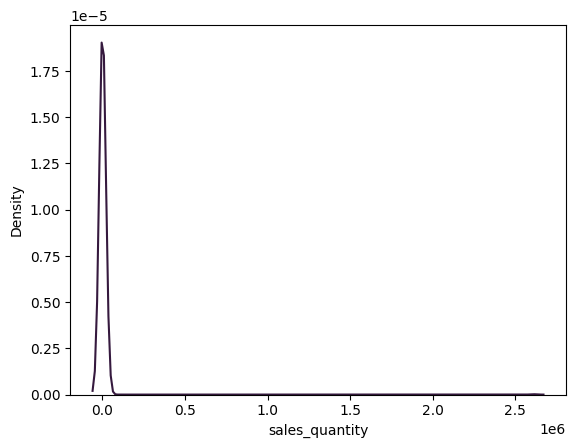

In [19]:
sales_by_entities = df.groupby('sku_id')['sales_quantity'].sum()

plt.figure()
sns.kdeplot(sales_by_entities)
plt.show()

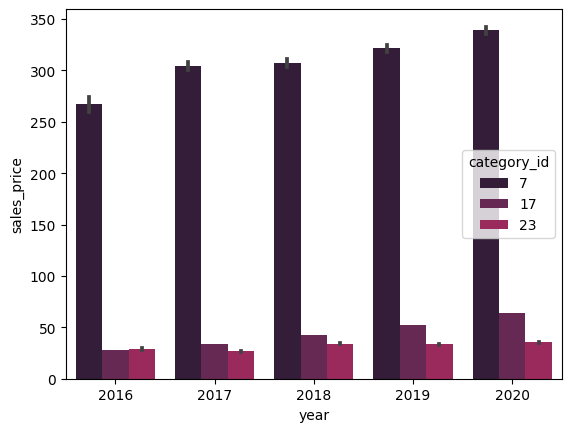

In [6]:
plt.figure()
sns.barplot(data=df, y='sales_price', x='year', hue='category_id')
plt.show()

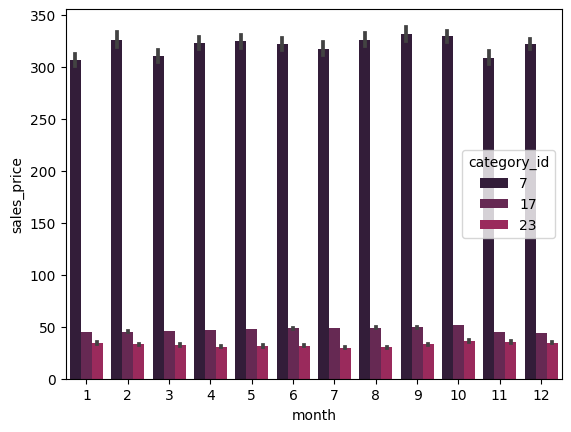

In [10]:
plt.figure()
sns.barplot(data=df, y='sales_price', x='month', hue='category_id')
plt.show()

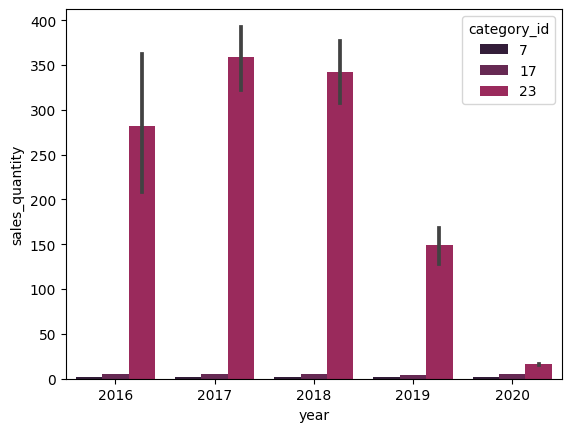

In [11]:
plt.figure()
sns.barplot(data=df, y='sales_quantity', x='year', hue='category_id')
plt.show()

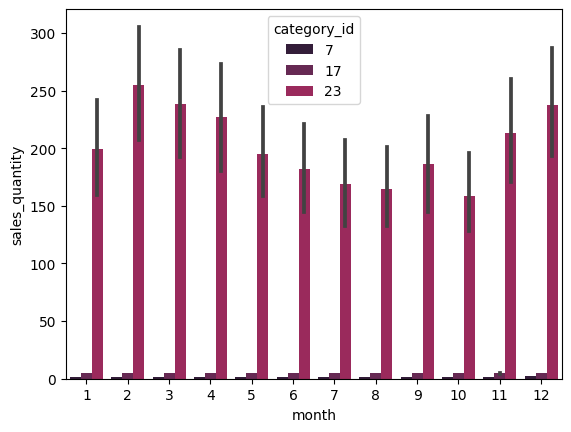

In [12]:
plt.figure()
sns.barplot(data=df, y='sales_quantity', x='month', hue='category_id')
plt.show()